In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.mixture import GaussianMixture

In [2]:
# Data snapshot from 3/11/2022
# https://donnees.montreal.ca/ville-de-montreal/actes-criminels
data = pd.read_csv("data/montreal_crime_data.csv", encoding='latin1')

In [3]:
data.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,0.000000,0.000000e+00,-76.237290,0.000000
4,Méfait,2017-07-29,jour,12.0,0.000000,0.000000e+00,-76.237290,0.000000


## Preprocessing & exploring

In [4]:
data.columns

Index(['CATEGORIE', 'DATE', 'QUART', 'PDQ', 'X', 'Y', 'LONGITUDE', 'LATITUDE'], dtype='object')

#### Meta information of data

In [5]:
print(f"Shape of data is: {data.shape}")

Shape of data is: (214322, 8)


In [6]:
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
CATEGORIE,object
DATE,object
QUART,object
PDQ,float64
X,float64
Y,float64
LONGITUDE,float64
LATITUDE,float64


## Data cleaning

#### Converting date feature to datatime format

In [7]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [8]:
data['DATE'].head()

0   2018-09-13
1   2018-04-30
2   2018-09-01
3   2017-07-21
4   2017-07-29
Name: DATE, dtype: datetime64[ns]

In [9]:
datatypes = pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')
datatypes

,Datatype
Columns,
CATEGORIE,object
DATE,datetime64[ns]
QUART,object
PDQ,float64
X,float64
Y,float64
LONGITUDE,float64
LATITUDE,float64


#### Checking for NaN values

In [10]:
pd.DataFrame(data.isnull().sum(), columns=['Nb of missing values']).rename_axis('Feature')

,Nb of missing values
Feature,
CATEGORIE,0
DATE,0
QUART,0
PDQ,5
X,0
Y,0
LONGITUDE,0
LATITUDE,0


## Visualization

In [16]:
classifier = GaussianMixture(n_components=2, covariance_type="full")

In [40]:
coords = np.vstack((data.X, data.Y)).T

array([[ 294904.15900121, 5047548.92099452],
       [ 294904.15900121, 5047548.92099452],
       [ 290274.565     , 5042150.474     ],
       ...,
       [ 299344.83600734, 5040364.06199609],
       [ 294968.04999209, 5047651.53899328],
       [ 291553.78100532, 5035569.50000576]])

In [57]:
filtereddata = list(filter(lambda d: ((d[0] > 1000 and d[1] > 1000) and (d[0] < 1e6)), coords))
filtereddata

[array([ 294904.15900121, 5047548.92099452]),
 array([ 294904.15900121, 5047548.92099452]),
 array([ 290274.565, 5042150.474]),
 array([ 297654.71500212, 5041877.07300758]),
 array([ 294259.780993  , 5051449.99999856]),
 array([ 285957.55599176, 5033790.67699391]),
 array([ 290274.565, 5042150.474]),
 array([ 294670.69600479, 5047694.59600339]),
 array([ 294670.69600479, 5047694.59600339]),
 array([ 294670.69600479, 5047694.59600339]),
 array([ 294670.69600479, 5047694.59600339]),
 array([ 300149.76399978, 5041903.01200646]),
 array([ 300495.60299448, 5042438.08700041]),
 array([ 302206.20400927, 5050672.09400368]),
 array([ 294834.48499071, 5050681.07299652]),
 array([ 298266.06 , 5038914.047]),
 array([ 294670.69600479, 5047694.59600339]),
 array([ 294670.69600479, 5047694.59600339]),
 array([ 294670.69600479, 5047694.59600339]),
 array([ 294670.69600479, 5047694.59600339]),
 array([ 292010.969, 5032898.   ]),
 array([ 297929.90699194, 5042565.5789987 ]),
 array([ 300675.21600806, 50

<function matplotlib.pyplot.show(close=None, block=None)>

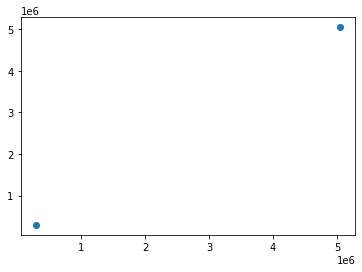

In [58]:
plt.scatter(filtereddata[0],y=filtereddata[1])
plt.show

In [59]:
classifier.fit(filtereddata)

GaussianMixture(n_components=2)